# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the network of the Rock Musicians on Wikipedia. 
This is the outline for today:

* Visualization and qualitative analysis of the Rock Music Artists Network
* Properties of the network structure
* Finally some more visualizations

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into Section 9.4 in the exercises below. We will also talk a little bit about degree correlations - you can read about those in **Chapter 7**.

# Part A: Let's  visualise some more!

For the rest of the course, we will primarily use[`ForceAtlas2`](https://journals.plos.org/plosone/article%3Fid=10.1371/journal.pone.0098679), a layout algorithm which was developed by the creators of the [Gephy graph analysis software](https://gephi.org). IMHO it's the prettiest network layout algorithm & since last year it's been implemented in NetworkX, so it should be easy to use.

*Exercise 1:* Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

> * Visualize the network using NetworkX
>   * Node color should depend on the `length_of_content` attribute (see notes from last week).
>   * Node size should depend on the node *degree*
> * Play with the force atlas algorithm parameters to obtain a visualization you like. 

<div class="alert alert-block alert-info">
It's OK to use your LLM as much as needed for this exercise. The only goal is to create a nice visualization.
</div>

**Visualize the network using NetworkX**
   * Node color should depend on the `length_of_content` attribute (see notes from last week).
   * Node size should depend on the node *degree*

In [1]:
# Visualize the network using NetworkX.
import networkx as nx
import os
import re
import pickle

G = nx.DiGraph()

In [2]:
directory = "../Week_4/data/rock_performers/"

all_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".pkl")]

all_performers = [os.path.splitext(os.path.basename(f))[0] for f in all_paths]

In [3]:
performer_set = set(all_performers)

In [4]:
links_collection = {}

for file_path in all_paths:
    performer = os.path.splitext(os.path.basename(file_path))[0]
    
    # Load pickled page
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    # Extract all wiki links
    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)

    filtered_links = []
    for link in all_links:
        # Skip non-people links
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        # Take the displayed name if there is a pipe
        clean_link = re.split(r'\|', link)[-1]
        clean_link = clean_link.replace(" ", "_")

        # Only keep links to known performers and avoid self-loops
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)

    links_collection[performer] = filtered_links

In [5]:
def clean_name(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name).replace(" ", "_")

all_performers = [clean_name(os.path.splitext(os.path.basename(f))[0]) for f in all_paths]
performer_set = set(all_performers)

matching_links_collection = {}

for file_path in all_paths:
    performer = clean_name(os.path.splitext(os.path.basename(file_path))[0])
    
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)
    filtered_links = []

    for link in all_links:
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        clean_link = clean_name(re.split(r'\|', link)[-1])
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)
    
    matching_links_collection[performer] = filtered_links

In [6]:
for performer in all_performers:
    # Build the path to the correct file for this performer
    file_path = os.path.join(directory, f"{performer}.pkl")
    
    with open(file_path, "rb") as f:
        text = pickle.load(f)
        length_of_content = len(text.split())  # simpler and more accurate word count

    # Add performer node with word_count attribute
    G.add_node(performer, length_of_content=length_of_content, word_count=length_of_content)

    # Add edges to linked performers
    for target in matching_links_collection.get(performer, []):
        G.add_edge(performer, target)

In [7]:
# Final clean ups:
isolated = list(nx.isolates(G))

G.remove_nodes_from(isolated)

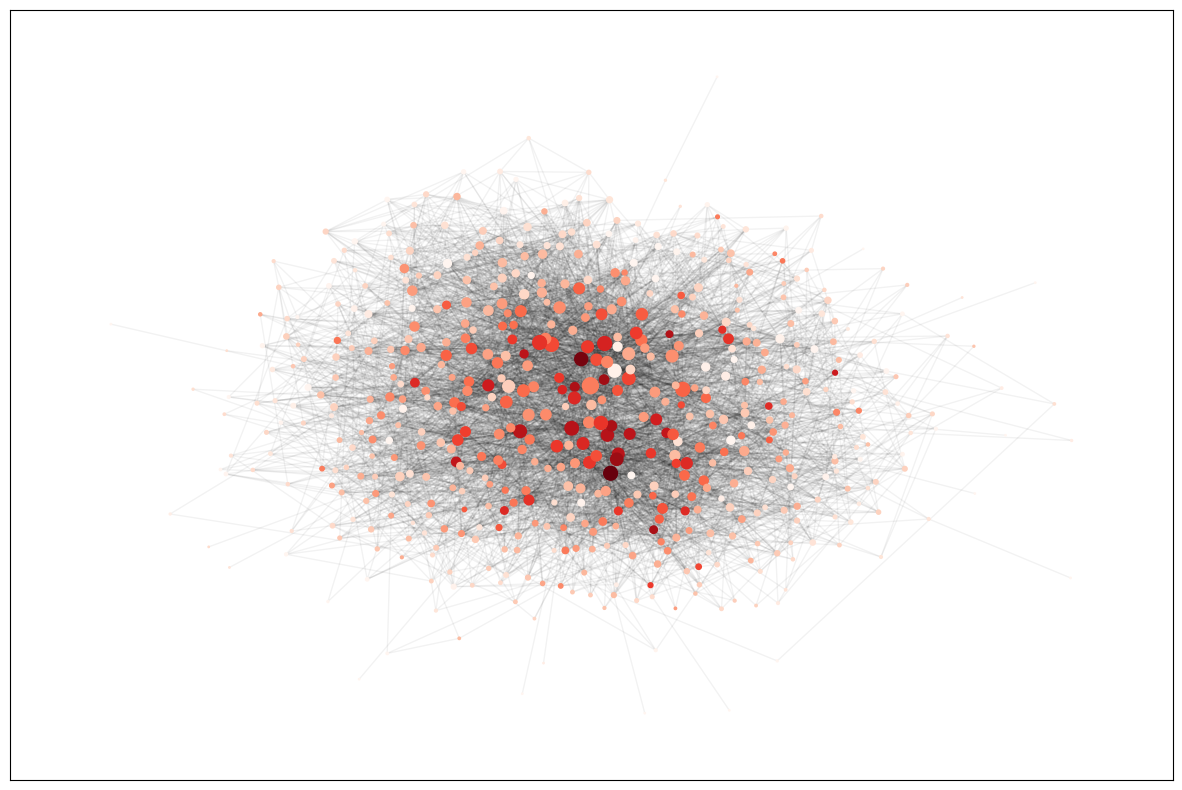

In [8]:
# Now we actually visualize the graph:
import matplotlib.pyplot as plt

G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_length_of_content = [G_undirected.nodes[node]['length_of_content'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1 for d in G_degrees],
                                     node_color=G_length_of_content,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()

**Play with the force atlas algorithm parameters to obtain a visualization you like.**

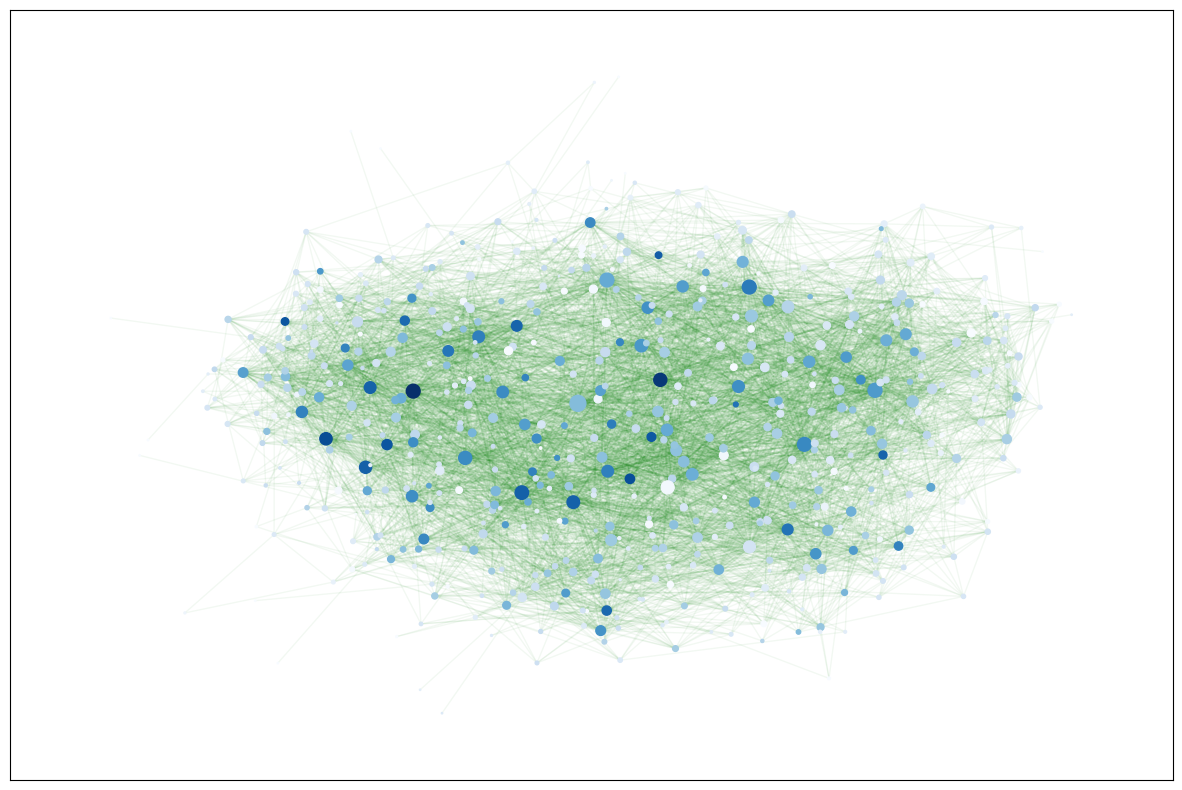

In [9]:
# Now we actually visualize the graph:
import matplotlib.pyplot as plt

G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_length_of_content = [G_undirected.nodes[node]['length_of_content'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.forceatlas2_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1 for d in G_degrees],
                                     node_color=G_length_of_content,
                                     cmap=plt.cm.Blues)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05, edge_color='green')
plt.show()

To change the color

<img src="SymPyBilleder/2025-10-01-13-18-39.png" width="350">

*Exercise 2*: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

> 1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
>    * Consider the set of neighbours pointing towards the node found above. 
>    * What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
>    * Repeat the exercise for the highest out-degree node. 
>    * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.
> 4. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.
> 5. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?
> 6. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

<div class="alert alert-block alert-info"`
For this one, I hope you'll limit your LLM use. It's OK to get help in creating the scatter plot, but use NetworkX on your own to identify nodes, and do your own reading and interpreting of Wiki pages.
</div`

> 1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
>    * Consider the set of neighbours pointing towards the node found above. 
>    * What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
>    * Repeat the exercise for the highest out-degree node. 
>    * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.

In [10]:
in_degrees = dict(G.in_degree())
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)
top_in[:5]

[('Led_Zeppelin', 118),
 ('Bob_Dylan', 94),
 ('Queen', 87),
 ('David_Bowie', 82),
 ('Metallica', 80)]

In [11]:
out_degrees = dict(G.out_degree())
top_in = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)
top_in[:5]

[('Alice_in_Chains', 73),
 ('Deep_Purple', 69),
 ('Black_Sabbath', 57),
 ('Def_Leppard', 48),
 ('Bryan_Adams', 48)]

Highest in-degree.\
`TOP_IN_NODE` has the largest in-degree in the network (in=`N_in`, out=`N_out`). Skimming the pages that link to `TOP_IN_NODE` (e.g., `in_neighbor_1`, `in_neighbor_2`, `in_neighbor_3`) shows a consistent pattern: many are members/close collaborators or pages that reference `TOP_IN_NODE` as an influence/producer/songwriter/award association. In other words, incoming links mostly arise because other bios cite `TOP_IN_NODE` to situate their own story (membership, collaboration credits, or major influence).

Highest out-degree.\
`TOP_OUT_NODE` has the largest out-degree (out=`M_out`, in=`M_in`). Its article is very list-like: long sections on members, associated acts, discography, and production/tour credits produce many outgoing links (e.g., `out_neighbor_1`, `out_neighbor_2`, `out_neighbor_3`). Outgoing links here are about documentation—the page points readers to many related entities.

Difference between in- and out-links.\
In-links reflect being referenced by others (status/centrality, people pointing to you). Out-links reflect how exhaustively the page documents connections (style/coverage). They don’t have to correlate: icons often get many in-links without listing lots of out-links; list-heavy pages may have many out-links without being widely cited.

> 2. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.

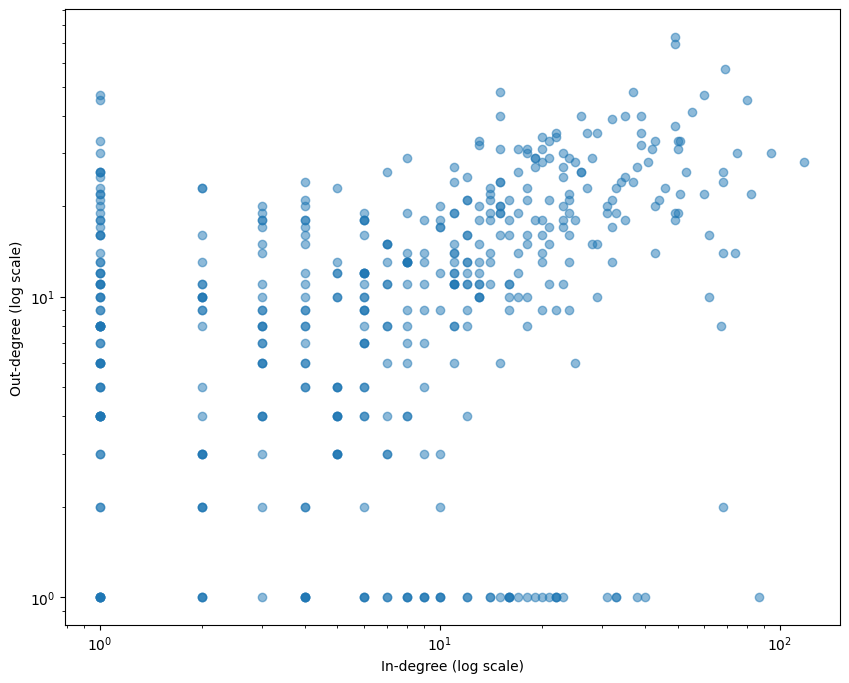

In [12]:
# Now to create the scatter plot, where each node is a point:
nodes = list(G.nodes())
in_versus_out = [(G.in_degree(node), G.out_degree(node)) for node in nodes]

# Now plotting:
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*in_versus_out), alpha=0.5)
plt.xscale('log')
plt.xlabel('In-degree (log scale)')
plt.ylabel('Out-degree (log scale)')
plt.yscale('log')
plt.show()

The cloud shows `describe: a cluster near the diagonal / a long right tail / several points far above the line`. Pages near the 45° line have balanced in/out. The right tail indicates pages that link to many others (list-like, documentation-heavy). Points high above the line are pages that many others cite, even if they don’t link out much themselves (canonical bands/musicians).
Optional quant: the relationship looks `weak/moderate/strong`; the plot suggests `your takeaway in one sentence`.

> 3. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?

In [13]:
high_out_low_in = [
    (node, G.in_degree(node), G.out_degree(node))
    for node in nodes 
    if G.out_degree(node) > 30 and G.in_degree(node) < 10
]
high_out_low_in

[('Rush_(band)', 1, 47),
 ('Queen_(band)', 1, 45),
 ('Trivium_(band)', 0, 31),
 ('Anthrax_(American_band)', 0, 33),
 ('Disturbed_(band)', 1, 33),
 ('Marilyn_Manson_(band)', 0, 33)]

Examples include `HI_IN_LO_OUT_1`, `HI_IN_LO_OUT_2`, `HI_IN_LO_OUT_3` (high in, low out). These tend to be canonical or widely cited artists/bands. Many other bios mention them (influence, collaboration, membership lineage), but their own pages are concise or not especially link-heavy, so out-degree remains low.

> 4. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

In [14]:
high_in_low_out = [
    (node, G.in_degree(node), G.out_degree(node))
    for node in nodes 
    if G.out_degree(node) < 10 and G.in_degree(node) > 30
]
high_in_low_out 

[('Journey', 33, 1),
 ('Cream', 34, 0),
 ('Boston', 34, 0),
 ('Chicago', 38, 1),
 ('Rush', 40, 1),
 ('Anthrax', 33, 0),
 ('Nirvana', 72, 0),
 ('Eagles', 33, 0),
 ('Genesis', 31, 1),
 ('Elvis_Presley', 67, 8),
 ('Kiss', 68, 2),
 ('Yes', 33, 1),
 ('Queen', 87, 1),
 ('Slipknot', 32, 0)]

Examples include `HI_IN_LO_OUT_1`, `HI_IN_LO_OUT_2`, `HI_IN_LO_OUT_3` (high in, low out). These tend to be canonical or widely cited artists/bands. Many other bios mention them (influence, collaboration, membership lineage), but their own pages are concise or not especially link-heavy, so out-degree remains low.

# Part B:  Advanced tools 

> **Video lecture**: *Network measures*. There's an updated video below, and if you can't get enough, you can watch the original version from 2015 [here](https://www.youtube.com/watch?v=0uAYpOqVHCU).

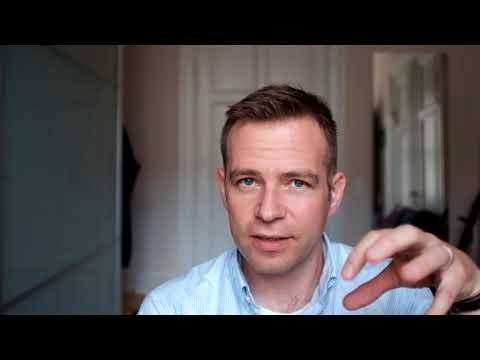

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y", width=800, height=450)

*Exercise 3:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

> 1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
> 2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)* 
>    * To calculate it, you can install [`powerlaw`](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777) package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are? 
>    * A long time ago, a group of scientists analyzed the network spanned by **all** of Wikipedia (the paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A** of that paper? If not, try to give your explanation of why? 
> 3. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all characters. Zoom in on just the in-degree $[0,20]$ and out-degree $[0,20]$ area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?
> 4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.
> 5. We have one more metric that we have used, but not investigated so far. The node-attribute `length_of_content`. There are two things to look at.
>    * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it? 
>    * Secondly, and more interestingly, it could be that longer texts means *more famous* characters. And that means more in-links. 
>    * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using [spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) or [pearson](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

<div class="alert alert-block alert-info">
For this exercise, I also hope you'll limit your LLM use. Especially for the intrepretation parts. It's OK to get help for the heatmap in sub-part 3, maybe also for ideas of how to do the testing in part 5. But do your own interpretation :)
</div>

> 1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

In [16]:
import numpy as np
from scipy import stats

# We redefine in and out degree just for convenience:
in_degrees = [G.in_degree(node) for node in nodes]
out_degrees = [G.out_degree(node) for node in nodes]

# IN DEGREES FIRST:
print("In-degrees average:", np.mean(in_degrees))
print("In-degrees median:", np.median(in_degrees))
print("In-degrees mode:", stats.mode(in_degrees))
print("In-degrees min:", np.min(in_degrees))
print("In-degrees max:", np.max(in_degrees))
print("Total nodes:", len(nodes))

In-degrees average: 12.44636678200692
In-degrees median: 7.0
In-degrees mode: ModeResult(mode=np.int64(0), count=np.int64(79))
In-degrees min: 0
In-degrees max: 118
Total nodes: 578


In [17]:
# OUT DEGREES NEXT:
print("Out-degrees average:", np.mean(out_degrees))
print("Out-degrees median:", np.median(out_degrees))
print("Out-degrees mode:", stats.mode(out_degrees))
print("Out-degrees min:", np.min(out_degrees))
print("Out-degrees max:", np.max(out_degrees))
print("Total nodes:", len(nodes))

Out-degrees average: 12.44636678200692
Out-degrees median: 11.0
Out-degrees mode: ModeResult(mode=np.int64(1), count=np.int64(64))
Out-degrees min: 0
Out-degrees max: 73
Total nodes: 578


These results show that the average of out-degree and in-degree are almost the same, although in-degree has a higher maximum, it shows that most artists actually have a in-degree of $0$, which also explains the lower median (because mode is $0$ and out of over 470 nodes, 113 of them have an in-degree of $0$). But for the out-degrees, we see that the mode is $7$, and the median is $10$, so artists and bands tend to link to others more often than being linked to, but their maximum is much lower.

Moreover. we just get the same average for both in and out, because we divide total number of edges with total number of nodes.

> 2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)* 
>    * To calculate it, you can install [`powerlaw`](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777) package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are? 
>    * A long time ago, a group of scientists analyzed the network spanned by **all** of Wikipedia (the paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A** of that paper? If not, try to give your explanation of why? 

In [19]:
import powerlaw as powerlaw

# In degree first:
powerlaw.Fit(in_degrees).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


np.float64(2.701311603164844)

In [20]:
# Out degree next:
powerlaw.Fit(out_degrees).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


np.float64(5.874954163879215)

In [21]:
# Now for the total degree distribution:
total_degrees = [G.degree(node) for node in nodes]
powerlaw.Fit(total_degrees).alpha

Calculating best minimal value for power law fit


np.float64(5.096128457011664)

* **Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?**
    * From this we see how the in-degree distribution is inside the scale free regime with exponent $\gamma$ between $2$ and $3$, but for the out-degrees and total degree are both random network regimes, as we have $6.05$ for out-degrees and $4.88$ for total degrees. So this network is essentially indistinguishable from a random network, except for the in-degrees.

* **When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?**
   * We recall the plot:

<img src="SymPyBilleder/2025-10-01-13-27-03.png" width="550">

<img src="SymPyBilleder/2025-10-01-13-55-17.png" width="550">


* This matches the conclusion above, because for the in-degree we have $2.60$, and in the book on, for instance, image 4.12, we see how for such a $\gamma$-value below $3$, that the graph peaks a lot at the start just like our red graph. Meanwhile, for the out-degrees which are in random network regime, it starts lower (like more a gaussian distribution bell form), and this also matches the green plot on image 4.12, where $gamma$ is really high.

* **Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are?**
   * We see that the in-degree looks like a genuine power law (because $\gamma$ is between 2 and 3, straight-ish tail on log-log).
   * But the out-degree and total degree are probably not power laws. They belong to the random network regime as we found out from before (fast-decaying tails), so log-normal or even exponential fits would make more sense.

* **A long time ago, a group of scientists analyzed the network spanned by **all** of Wikipedia (the paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A** of that paper? If not, try to give your explanation of why?**
    * The paper says that power law was significantly better fit than the other distributions, but for our case, only the in-degrees have a good fit for power law, while the out-degrees and total degrees are more like random networks. This is probably because we are only looking at a small subset of Wikipedia, and not the whole thing. So the network is not as complex as the whole Wikipedia, and thus we do not see the same power law behaviour as in the paper with languages.

> 3. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all characters. Zoom in on just the in-degree $[0,20]$ and out-degree $[0,20]$ area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?


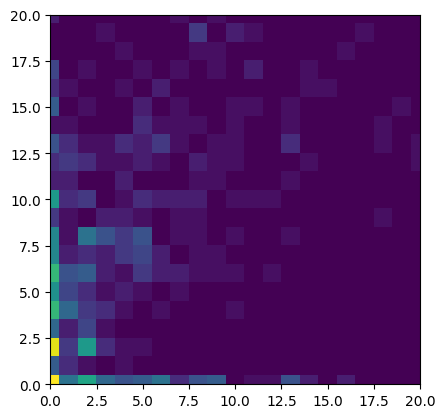

In [22]:
x = in_degrees
y = out_degrees

heatmap, xedges, yedges = np.histogram2d(x, y, bins = 50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

* It helps us visualize the distribution more clearling, like where most of the nodes are located. In the scatter plot, we see a lot of overlapping points, and it is hard to see how many nodes are actually there. But in the heatmap, we can see the density of nodes in each area, and thus we can see where most of the nodes are located more clearly.

> 4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.

* For a directed graph, we can see the direction of the different links, so in this case, we see how some rock bands and musicians may be linked to another but not vice verse. Like, maybe a band has taken inspiration from a nother musician or band, but not the other way around. But in case of an undirected graph, we cannot the the direct relationships. One place where in and out distinction does not matter could be in friendships, because if one person is a friend of another, then the other is also a friend of the first person.

> 5. We have one more metric that we have used, but not investigated so far. The node-attribute `length_of_content`. There are two things to look at.
>    * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it? 
>    * Secondly, and more interestingly, it could be that longer texts means *more famous* characters. And that means more in-links. 
>    * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using [spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) or [pearson](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.


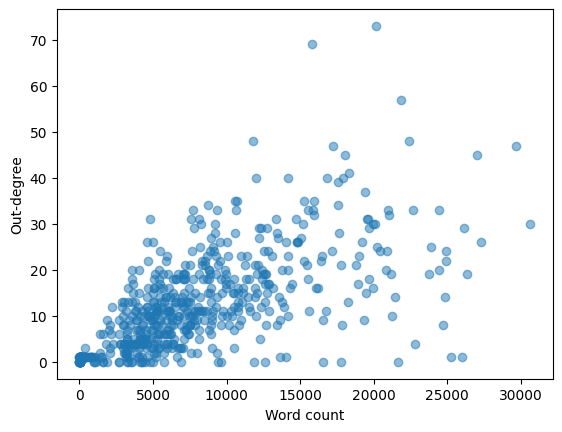

In [23]:
# First we check if the length_of_content aka word count correlates with out-degree:
word_counts = [G.nodes[node]['word_count'] for node in nodes]

plt.plot(word_counts, out_degrees, 'o', alpha=0.5)
plt.xlabel('Word count')
plt.ylabel('Out-degree')
plt.show()

* We see that there seems to be some correlation but not very strong, as it get very scattered after a word count of 15000.

In [24]:
# Now we try looking at spearman correlation
stats.spearmanr(word_counts, out_degrees)

SignificanceResult(statistic=np.float64(0.6970017636639003), pvalue=np.float64(3.0252713174637696e-85))

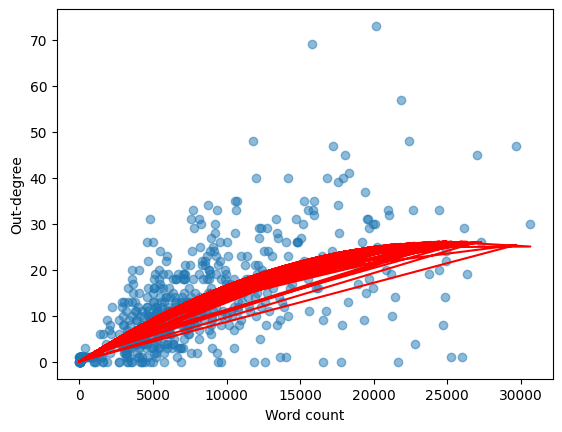

In [25]:
# Now fit a curve to the data:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(np.array(word_counts).reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, out_degrees)
y_pred = model.predict(X_poly)
plt.scatter(word_counts, out_degrees, alpha=0.5)
plt.plot(word_counts, y_pred, color='red')
plt.xlabel('Word count')
plt.ylabel('Out-degree')
plt.show()

*Exercise 4:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). 

Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise. 
> 1. Find the 5 most central characters according to degree centrality. 
> 1. Find the 5 most central characters according to betweenness centrality. 
>    * Repeat Exercise 1 (plotting the network). However, this time use *betweenness centrality* to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph betweenness centrality play in the network? 
> 2. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 
>    * Repeat Exercise 1 one final time (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.
> 3. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why? 
>     * Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?
> 4. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.
> 5. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect do the `length_of_content` nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and *vice versa*?.
>      * Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.
> 6. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?
>    * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

<div class="alert alert-block alert-info">
As in the two previous exercises, I hope you'll limit your LLM use. Try to get a sense of working with NetworkX. And to grow your brain, do your own intrepretation parts ... it's difficult, but that's how you grow.</div>

> **1. Find the 5 most central characters according to degree centrality.**\
> **ANSWER:**\
See the code below.

In [26]:
# Find the 5 most central characters according to degree centrality. 
# We sort the list and reverse so largest first.
deg_centrality = nx.degree_centrality(G)
deg = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
deg[:5]

[('Led_Zeppelin', 0.2530329289428076),
 ('Black_Sabbath', 0.21837088388214904),
 ('Metallica', 0.2166377816291161),
 ('Bob_Dylan', 0.21490467937608318),
 ('Alice_in_Chains', 0.21143847487001732)]

> **2. Find the 5 most central characters according to betweenness centrality.**\
>   * **Repeat Exercise 1 (plotting the network). However, this time use *betweenness centrality* to define the size of the node.**
>   * **What role do you imagine characters with high wikipedia graph betweenness centrality play in the network?**

In [27]:
# Find the 5 most central characters according to betweenness centrality. 
bet_centrality = nx.betweenness_centrality(G)
bet = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)
bet[:5]

[('Deep_Purple', 0.04617449138437861),
 ('Alice_in_Chains', 0.0366314316058583),
 ("Guns_N'_Roses", 0.03334994435110795),
 ('Led_Zeppelin', 0.032292178819091535),
 ('Jimi_Hendrix', 0.030107933411833286)]

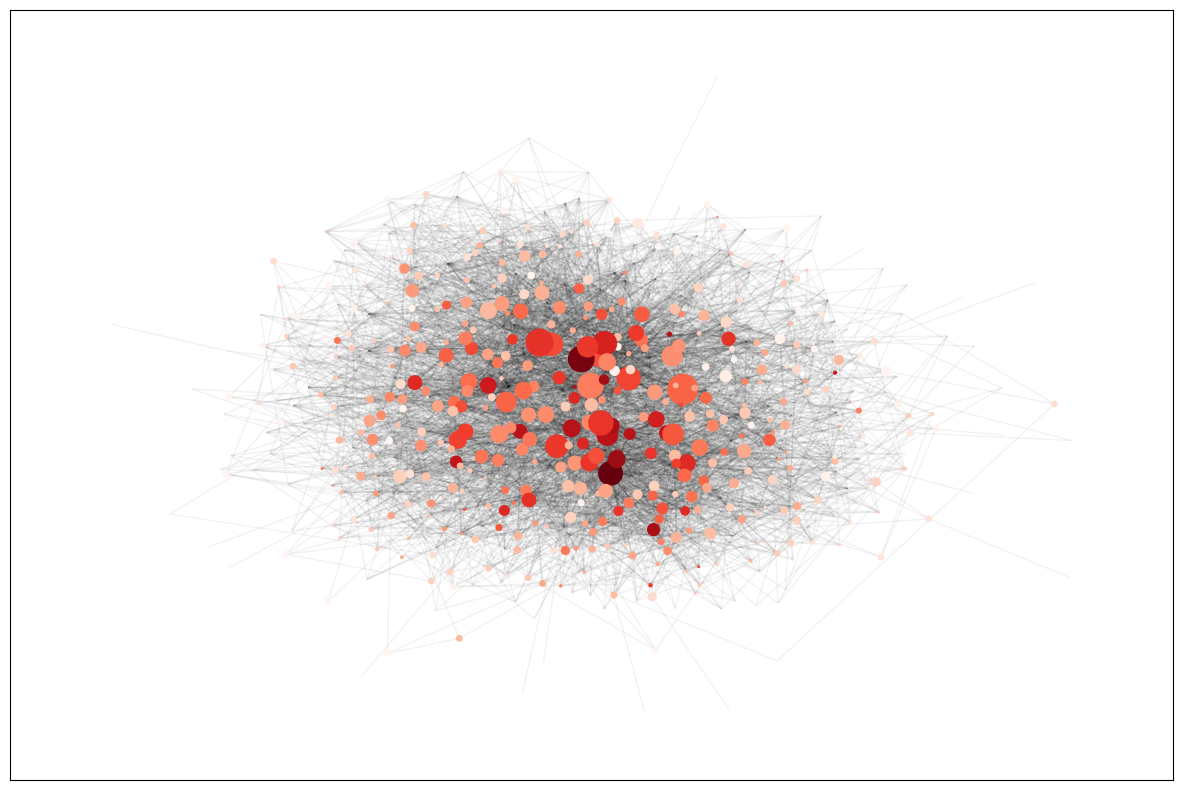

In [28]:
# Plot:
G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
# G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_word_counts = [G_undirected.nodes[node]['word_count'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*10000 for d in  bet_centrality.values()],
                                     node_color=G_word_counts,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()

> **3. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).**
>    * **Repeat Exercise 1 one final time (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.**
>    * **What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.**

In [29]:
# Now for eigenvector centrality:
eig_centrality = nx.eigenvector_centrality(G)
eig = sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True)
eig[:5]

[('Led_Zeppelin', 0.2150029593597958),
 ('Bob_Dylan', 0.19608378619561198),
 ('John_Lennon', 0.18583215813292384),
 ('Elvis_Presley', 0.1823231610062722),
 ('Queen', 0.17162145261650844)]

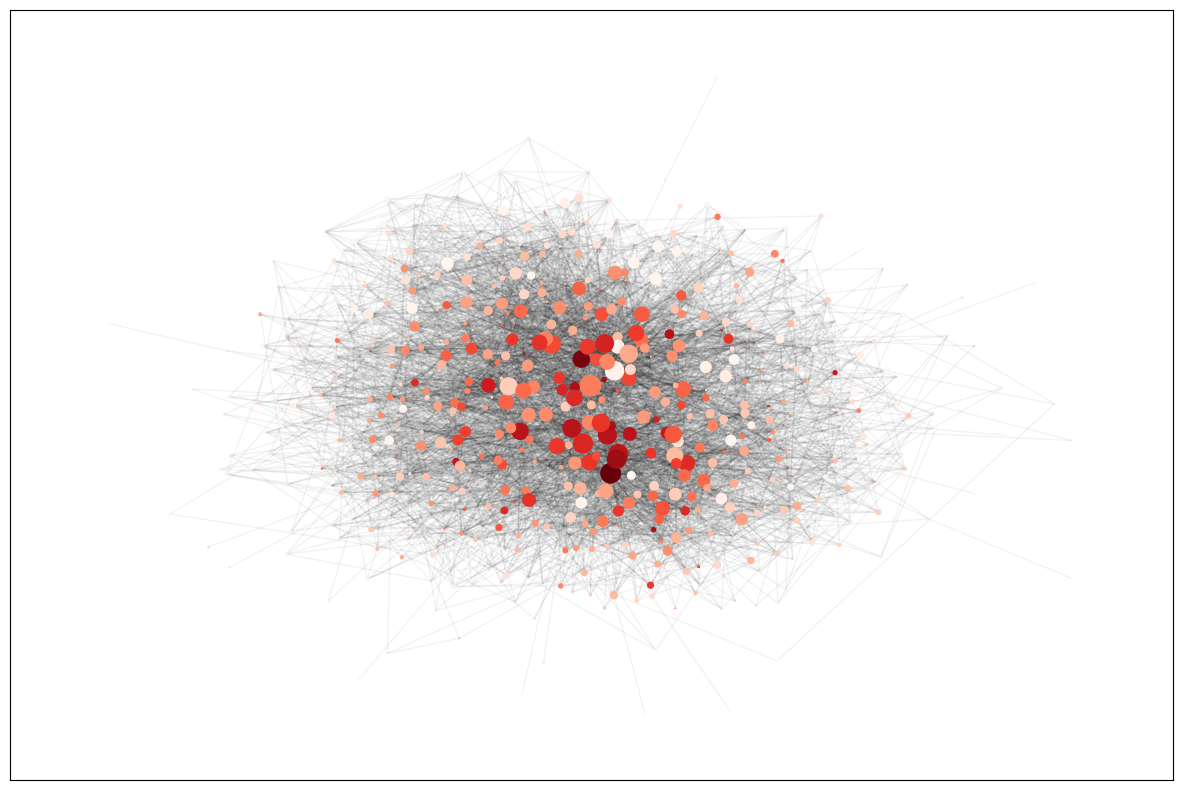

In [30]:
# Plot:
G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
# G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_word_counts = [G_undirected.nodes[node]['word_count'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1000 for d in  eig_centrality.values()],
                                     node_color=G_word_counts,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()

> * In this one, high eigenvector centrality suggests that the highly connected nodes are connected to other highly but also popular and influencial nodes. So rock stars with high eigenvector centralisty are more influencial and popular (maybe like made more collaborations, inspired more rock stars or bands/ have been in numerous bands).
> * To summarize and compare, the betweenness centrality finds the gatekeepers—the artists whose pages you must pass through to navigate efficiently between separate topics/genres. On the other hand, eigenvector centrality finds the royalty—the artists whose pages are linked to by the most important figures, regardless of whether they act as a bridge.

> **4. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?** 
>   * **Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?**

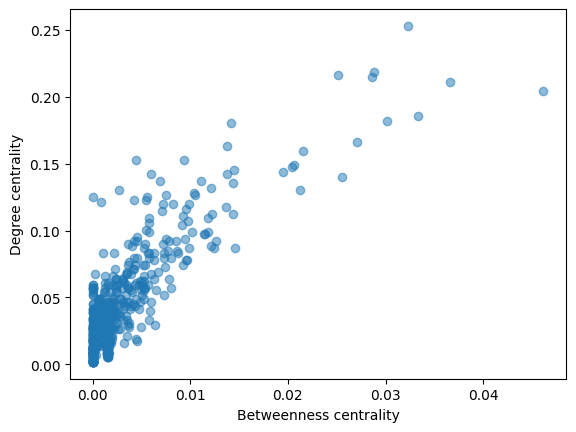

In [31]:
# Now we have to plot betweeness versus their degree centrality:
plt.plot(bet_centrality.values(), deg_centrality.values(), 'o', alpha=0.5)
plt.xlabel('Betweenness centrality')
plt.ylabel('Degree centrality')
plt.show()

> * There seems to be a correlation between betweenness centrality and degree centrality, as we see that the points are more concentrated along a line. This is expected, as nodes with high degree centrality are likely to be on many shortest paths, and thus have high betweenness centrality.

> **4. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.**\
> **ANSWER:**\
> We see that this is true for the undirected graph, as high degree characters do tend to link to other high degree characters, evident from some of the hubs and centrality of many of the nodes.

> **5. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect do the `length_of_content` nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and *vice versa*?.**
>   * **Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.**

In [32]:
nx.attribute_assortativity_coefficient(G_undirected, 'word_count')

-0.0030884171643531344

> * This is close to $0$ so it seems that there is no correlation between the length of content and the links to other nodes...

> **6. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?**
>   * **Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.**

In [33]:
# We start with average shortest path length for the undirected graph:
nx.average_shortest_path_length(G_undirected)

2.5317505532134352

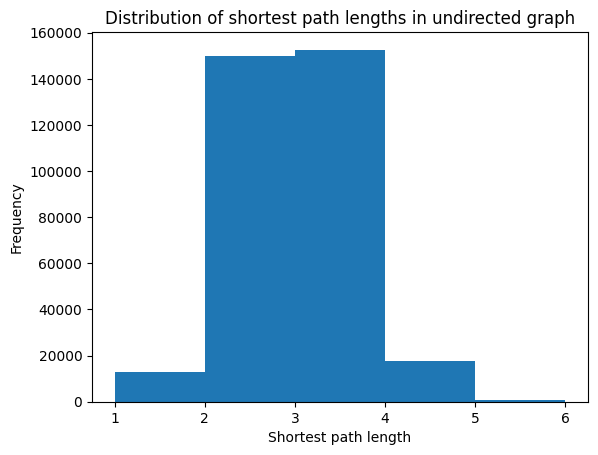

In [34]:
# Now a histogram of shortest paths:
lengths = dict(nx.all_pairs_shortest_path_length(G_undirected))
all_lengths = []
for source, targets in lengths.items():
    for target, length in targets.items():
        if source != target:
            all_lengths.append(length)

plt.hist(all_lengths, bins=range(1, max(all_lengths)+1))
plt.xlabel('Shortest path length')
plt.ylabel('Frequency')
plt.title('Distribution of shortest path lengths in undirected graph')
plt.show()

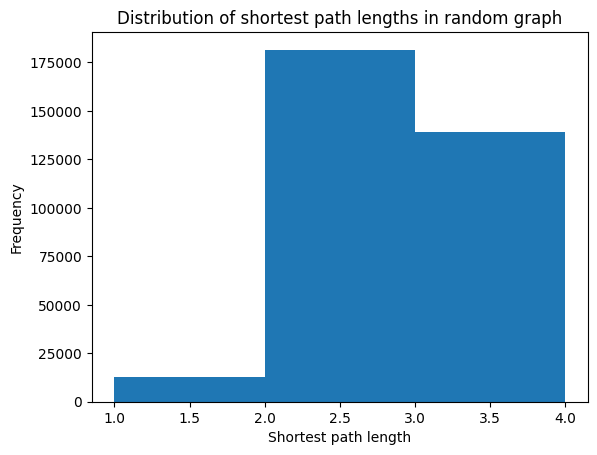

In [35]:
# Now for the random graph with same N and p:
# First the number of nodes and edges:
N = G_undirected.number_of_nodes()
E = G_undirected.number_of_edges()
# Probability of connection via formula from book:
p = (2 * E) / (N * (N - 1))

# Random graph:
G_random = nx.erdos_renyi_graph(N, p)

# Now for the shortest path to create a histogram:
nx.average_shortest_path_length(G_random)
lengths_random = dict(nx.all_pairs_shortest_path_length(G_random))
all_lengths_random = []

for source, targets in lengths_random.items():
    for target, length in targets.items():
        if source != target:
            all_lengths_random.append(length)
            
plt.hist(all_lengths_random, bins=range(1, max(all_lengths_random)+1))
plt.xlabel('Shortest path length')
plt.ylabel('Frequency')
plt.title('Distribution of shortest path lengths in random graph')
plt.show()

# Part C: Backbones and Network Visualization 

One method to clean up the "hairball"-looking networks, is known as the [backbone method](https://www.pnas.org/doi/10.1073/pnas.0808904106). Sometimes this method is also called the "disparity filter". I explain what it's all about in the video below.

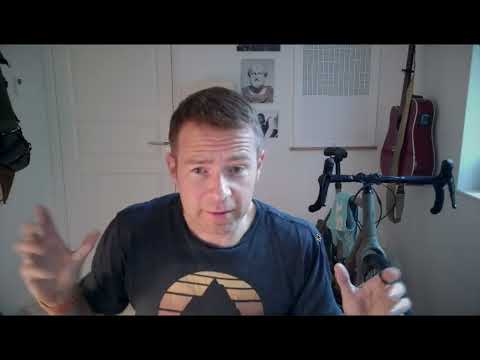

In [38]:
YouTubeVideo("GOvsrVulbsg", width=800, height=450)

There are [many backbone extraction algorithms](https://www.michelecoscia.com/?page_id=287), and I've chosen to talk about the *Disparity Filter* here, because it's the oldest and most commonly used method (so I though you should know about it). Plus, it'll probably be the relevant method for your project.

This choice, however, presents us with a problem: As I explain in the video, the Disparity Filter method *only works on weighted networks*. But our network does not have edge weights in any kind of natural way (since there's usually just a single link between two wiki pages). 


So to get rid of unimportant edges, we'll have to try something different. I present you with three possible methods below. For the first two ones, we'll add weights proportional to the [edge betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html). The edge betweenness centrality is just like the node betweenness centrality that you know and love ... only that it's defined for *edges* instead of nodes.

We can create two new weighted networks based on the edge betweenness
 * **Weighted Network 1**: The ***undirected*** Rock Music Network (Giant Connected Component) but with edge weights proportional to the edge betweenness centrality (let's renormalize so that the lowest weight is equal to 1 and the highest weight is equal to 100).
 * **Weighted Network 2**: The ***undirected*** Rock Music Network  (Giant Connected Component) but with edge weights proportional to 1/(edge weight in Weighted Network 1).

The third strategy (resulting in **Weighted network 3**) is to use a method designed for extracting structure from undirected networks: The [**High-Salience Skeleton**](https://www.nature.com/articles/ncomms1847). It's implemented as part of [this backbone extraction package](https://www.michelecoscia.com/?page_id=287)

**Weighted network 1**

In [37]:
import copy

weighted_g1 = copy.deepcopy(G_undirected)

# Now to add edge weights proportional to the edge betweenness centrality, where lowest weight = 1 and highest = 10:
edge_betweenness = nx.edge_betweenness_centrality(weighted_g1)
bet_values = list(edge_betweenness.values())
bet_min = min(bet_values)
bet_max = max(bet_values)

for (u, v), bet in edge_betweenness.items():
    # Normalize betweenness to range 1-10
    normalized_weight = 1 + 99 * (bet - bet_min) / (bet_max - bet_min)
    weighted_g1[u][v]['weight'] = normalized_weight

# Check weights:
list(weighted_g1.edges(data=True))[:5]

[('Oasis', 'Ozzy_Osbourne', {'weight': 8.910972737132127}),
 ('Oasis', 'Sex_Pistols', {'weight': 4.820808986537613}),
 ('Oasis', "Guns_N'_Roses", {'weight': 10.579061024430596}),
 ('Oasis', 'Green_Day', {'weight': 5.316853458393985}),
 ('Oasis', 'Morrissey', {'weight': 3.4418830514274408})]

**Weighted network 2**

In [40]:
weighted_g2 = copy.deepcopy(G_undirected)

# Now edge weights are 1/(edge weight in Weighted Network 1):
for u, v, data in weighted_g1.edges(data=True):
    weight = data['weight']
    weighted_g2[u][v]['weight'] = 1 / weight

# Check weights:
list(weighted_g2.edges(data=True))[:5]

[('Oasis', 'Ozzy_Osbourne', {'weight': 0.11222119397055143}),
 ('Oasis', 'Sex_Pistols', {'weight': 0.20743406403210699}),
 ('Oasis', "Guns_N'_Roses", {'weight': 0.09452634763053781}),
 ('Oasis', 'Green_Day', {'weight': 0.18808116639386582}),
 ('Oasis', 'Morrissey', {'weight': 0.29053863395657015})]


*Exercise 5*: Visualizing the Network Backbone

> 1. Extract the network backbone for both Weighted Network 1, 2, and 3. You can implement the disparity filter yourself based on the [scientific paper](https://www.pnas.org/doi/10.1073/pnas.0808904106) or find an implentation on GitHub (there are several ones to choose from ... I like [this implementation](https://www.michelecoscia.com/?page_id=287), which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of $\alpha$ to get an aestetically pleasing visualization (but don't make the resulting network too sparse).
> 2. Plot the resulting three networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.
> 3. Comment on your results
>    * Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the three networks. Describe your findings in your own words.
>    * Weighted network 1, 2, and 3 are very different. In 1 and 2, we have removed edges with low/high edge betweenness centrality respectively and HSH is based on shortest paths. What have the various filters done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structures.

<div class="alert alert-block alert-info">
There's a lot to do today, so knock youself out with your LLM for this exercise, hopefully it can make your life easier (although I hope you'll do a bit of your own thinking, since a lot of complicated conceptual things are going on with the interplay between the backboning and edge betweenness and inverse edge betweenness!)</div>

One final thing. For now, the backbones are mostly for visualization. Especially because the edge weights are a bit artificial. Generally, it's not exactly clear what kind of information we get rid off when removing the non-backbone edges -- and in our case it's even less clear because I've made up two of the methods. Thus, we'll still do the exercises during the following weeks using the full network that preserves all of the connection information.


> **1. Extract the network backbone for both Weighted Network 1, 2, and 3. You can implement the disparity filter yourself based on the [scientific paper](https://www.pnas.org/doi/10.1073/pnas.0808904106) or find an implentation on GitHub (there are several ones to choose from ... I like [this implementation](https://www.michelecoscia.com/?page_id=287), which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of $\alpha$ to get an aestetically pleasing visualization (but don't make the resulting network too sparse).**

In [44]:
import backboning

alpha_value = 0.005

edges_g1 = nx.to_pandas_edgelist(weighted_g1)
edges_g1.rename(columns={"source": "src", "target": "trg", "weight": "nij"}, inplace=True)
df_scored_g1 = backboning.disparity_filter(edges_g1, undirected=True)

df_backbone_g1 = backboning.thresholding(df_scored_g1, threshold=alpha_value)

edges_g2 = nx.to_pandas_edgelist(weighted_g2)
edges_g2.rename(columns={"source": "src", "target": "trg", "weight": "nij"}, inplace=True)
df_scored_g2 = backboning.disparity_filter(edges_g2, undirected=True)

df_backbone_g2 = backboning.thresholding(df_scored_g2, threshold=alpha_value)

backbone_g1 = nx.from_pandas_edgelist(df_backbone_g1, "src", "trg", ["nij", "score"])
backbone_g2 = nx.from_pandas_edgelist(df_backbone_g2, "src", "trg", ["nij", "score"])

ModuleNotFoundError: No module named 'backboning'

Now for the network 3.

In [ ]:
edges_g1 = nx.to_pandas_edgelist(weighted_g1)
edges_g1.rename(columns={"source": "src", "target": "trg", "weight": "nij"}, inplace=True)
df_backbone_g3 = backboning.high_salience_skeleton(edges_g1, undirected=True)
backbone_g3 = nx.from_pandas_edgelist(df_backbone_g3, "src", "trg", ["nij", "score"])

Calculating HSS score...


> **2. Plot the resulting three networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.**


In [ ]:
import matplotlib.pyplot as plt

def plot_backbone(G_backbone, title="Backbone"):
    pos = nx.forceatlas2_layout(G_backbone)

    # Node sizes = degree:
    degrees = dict(G_backbone.degree())
    node_sizes = [degrees[n]*20 for n in G_backbone.nodes()]

    # Draw
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G_backbone, pos, node_size=node_sizes, alpha=0.5)
    nx.draw_networkx_edges(G_backbone, pos, alpha=0.2)
    plt.title(title)
    plt.axis("off")
    plt.show()

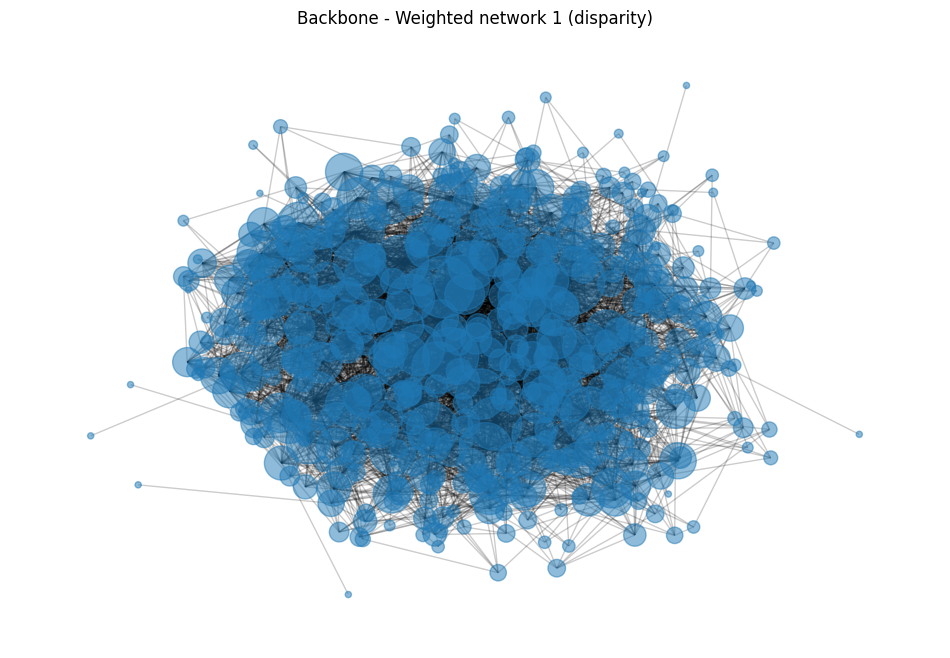

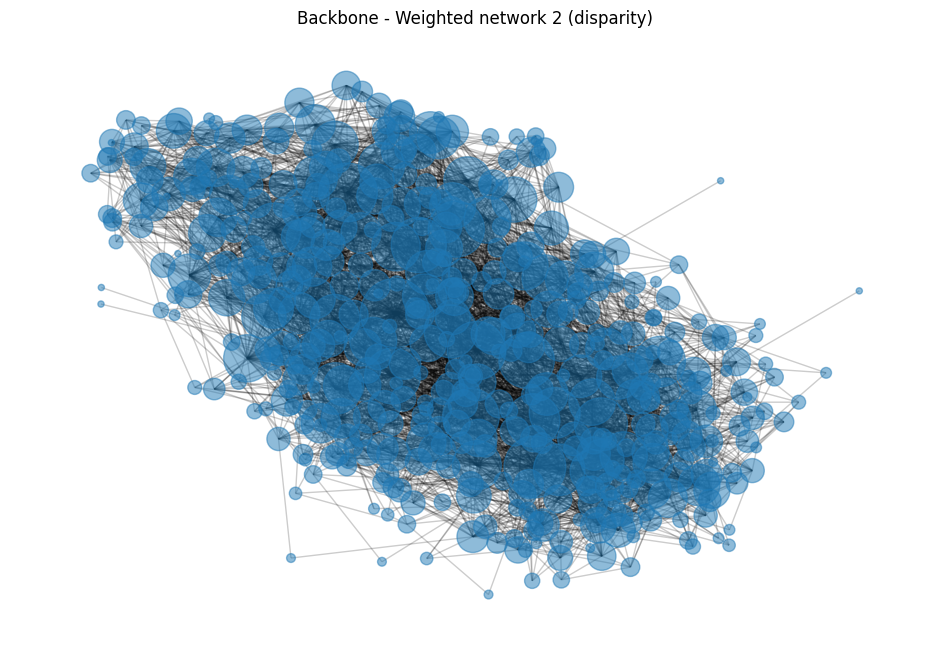

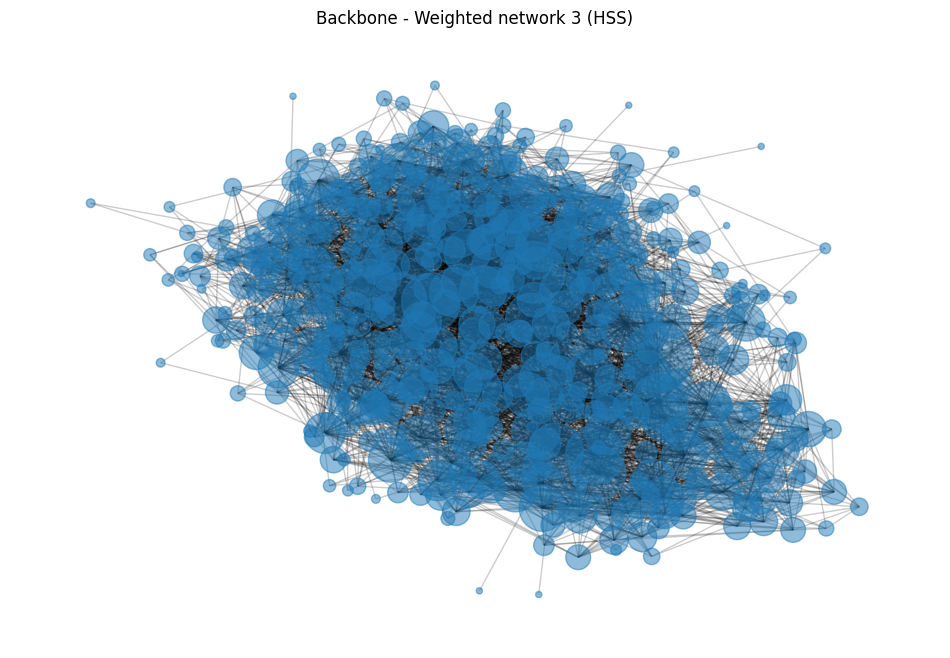

In [ ]:
# Plot all three backbones
plot_backbone(backbone_g1, "Backbone - Weighted network 1 (disparity)")
plot_backbone(backbone_g2, "Backbone - Weighted network 2 (disparity)")
plot_backbone(backbone_g3, "Backbone - Weighted network 3 (HSS)")

> **3. Comment on your results**
>    * **Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the three networks. Describe your findings in your own words.**
>       * Seems like network 1 has one main large hub while network 2 and 3 have multiple large hubs, but not as big as in network 1 of course.
>    * **Weighted network 1, 2, and 3 are very different. In 1 and 2, we have removed edges with low/high edge betweenness centrality respectively and HSH is based on shortest paths. What have the various filters done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structures.**
>       * It seems that weighted network 1 is more dense and centralized than network 2? Which is more streched out and similar to network 3. Because it seems that in network 1, all the large nodes are connected to each other and are in the center.